In [1]:
%cd /content/drive/MyDrive/BU Summer 22/CSE422/ML proj/

/content/drive/MyDrive/BU Summer 22/CSE422/ML proj


In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.metrics import accuracy_score

### Dataset

In [3]:
df = pd.read_csv('mail_data.csv')

In [4]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
# Total number of mails each category has
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [6]:
# Removing the duplicate mails from the dataset
df.drop_duplicates(inplace=True)

In [7]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
# Total mails each category has after removing the duplicate mails from the dataset
df['Category'].value_counts()

ham     4516
spam     641
Name: Category, dtype: int64

In [9]:
# Removing the null values if there is any
df.isnull().sum()

Category    0
Message     0
dtype: int64

**Label encoding**

In [10]:
# Label spam mail as 0 and ham mail as 1
df.loc[df['Category'] == 'spam', 'Category'] = 0
df.loc[df['Category'] == 'ham', 'Category'] = 1

In [11]:
df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


**Separate x and y**

In [12]:
# Separating the dataset into x and y 
x = df['Message']
y = df['Category']

**Split dataset**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=3)

In [15]:
ytrain = ytrain.astype('int')
ytest = ytest.astype('int')

In [16]:
print(x.shape)
print(xtrain.shape)
print(xtest.shape)

(5157,)
(4125,)
(1032,)


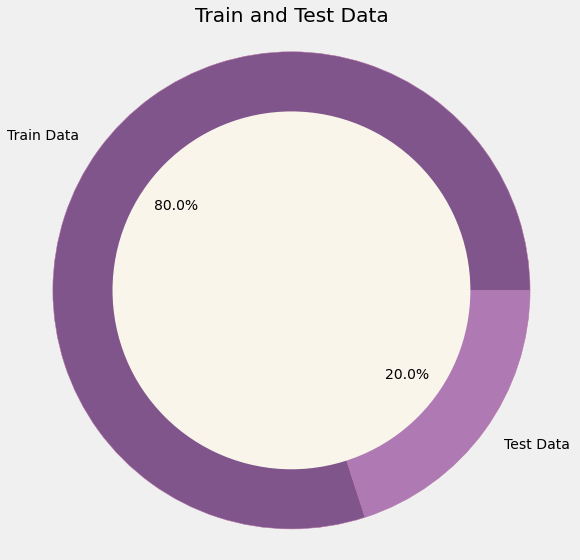

In [17]:

from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")

plt.title("Train and Test Data")
# desc = pd.DataFrame({'Train Data': xtrain.shape, 'Test Data': xtest.shape})

train_percentage = xtrain.shape[0] / xtest.shape[0] * 100
test_percentage = xtest.shape[0] / xtest.shape[0] * 100

slices = [train_percentage, test_percentage]
labels = ['Train Data', 'Test Data']
colors = ['#80558C', '#AF7AB3']

plt.pie(slices, labels=labels, colors=colors, autopct='%1.1f%%', wedgeprops={'edgecolor': '#B270A2'})
plt.axis('equal')

circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='#F9F5EB')
plt.gca().add_artist(circle)

# bg = plt.figure()
# bg.patch.set_facecolor('white')

size = plt.gcf()
size.set_size_inches(9, 9) # or (4,4) or (5,5) or whatever

plt.show()

**Data preprocessing**

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cv = CountVectorizer()
x_train = cv.fit_transform(xtrain)

In [20]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Naive Bayes

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
# model1 = MultinomialNB()
model1.fit(x_train, ytrain)

NameError: ignored

In [ ]:
x_test = cv.transform(xtest)

In [ ]:
x_test.toarray()

In [ ]:
model1.score(x_test, ytest)

In [ ]:
emails = ['hey i am looking for ML tutorial in Bangla', 
          'hey you have won an iphone 13 pro max. Fill up the survey',
          "free entry in 2 a weekly cmp to win FA Cup Final tckts 21st August 2015"]
cv_emails = cv.transform(emails)

In [ ]:
model1.predict(cv_emails)

In [ ]:
prediction_NB_1 = model1.predict(x_train)
accuracy_NB_1 = accuracy_score(ytrain, prediction_NB_1)
print(accuracy_NB_1)

In [ ]:
prediction_NB_2 = model1.predict(x_test)
accuracy_NB_2 = accuracy_score(ytest, prediction_NB_2)
print(accuracy_NB_2)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model2 = LogisticRegression()

In [ ]:
model2.fit(x_train, ytrain)

In [ ]:
prediction_LR_1 = model2.predict(x_train)
accuracy_LR_1 = accuracy_score(ytrain, prediction_LR_1)
print(accuracy_LR_1)

In [ ]:
prediction_LR_2 = model2.predict(x_test)
accuracy_LR_2 = accuracy_score(ytest, prediction_LR_2)
print(accuracy_LR_2)

In [ ]:
model2.score(x_test, ytest)

In [ ]:
# knn
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()

In [ ]:
model3.fit(x_train, ytrain)

In [ ]:
prediction_KNN_1 = model3.predict(x_train)
accuracy_KNN_1 = accuracy_score(ytrain, prediction_KNN_1)
print(accuracy_KNN_1)

In [ ]:
prediction_KNN_2 = model3.predict(x_test)
accuracy_KNN_2 = accuracy_score(ytest, prediction_KNN_2)
print(accuracy_KNN_2)

In [ ]:
model3.score(x_test, ytest)

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()

In [ ]:
model4.fit(x_train, ytrain)

In [ ]:
prediction_DTC_1 = model4.predict(x_train)
accuracy_DTC_1 = accuracy_score(ytrain, prediction_DTC_1)
print(accuracy_DTC_1)

In [ ]:
prediction_DTC_2 = model4.predict(x_test)
accuracy_DTC_2 = accuracy_score(ytest, prediction_DTC_2)
print(accuracy_DTC_2)

In [ ]:
model4.score(x_test, ytest)